In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import configparser

config = configparser.ConfigParser()

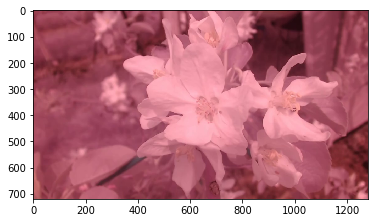

In [2]:
videoNo = "0012"
loc = "TestVideo/"
vidExtension = "__cv_camera01__video.avi"


path = loc + videoNo + vidExtension
path2 = "TestVideo/cebela1k.mp4"
vidcap = cv2.VideoCapture(path2)
res, frame = vidcap.read()


#frame = cv2.imread("slika_socvetja.png")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = cv2.resize(frame, (1280, 720))
if res:
    plt.imshow(frame)
else:
    print(frame)
    print(path)

<IPython.core.display.Javascript object>


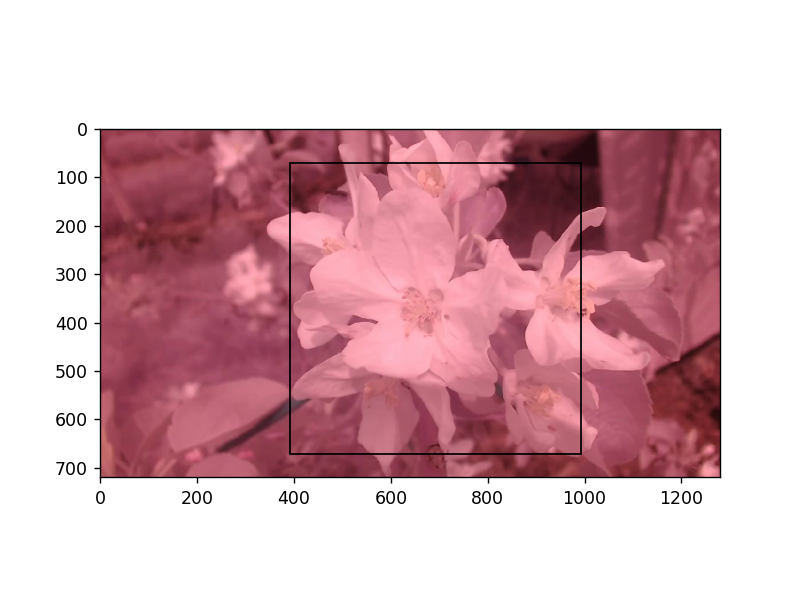

In [3]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(frame)

#Nastavi v velikosti socvetja
size = (600, 600)

def onclick(event):
    if event.key == 'shift':
        global ROIgX, ROIgY
        ROIgX, ROIgY = int(event.xdata), int(event.ydata)
        
        square = plt.Rectangle((ROIgX - size[0]/2, ROIgY - size[1]/2), size[0], size[1], fill=False)
        ax.add_patch(square)
        fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


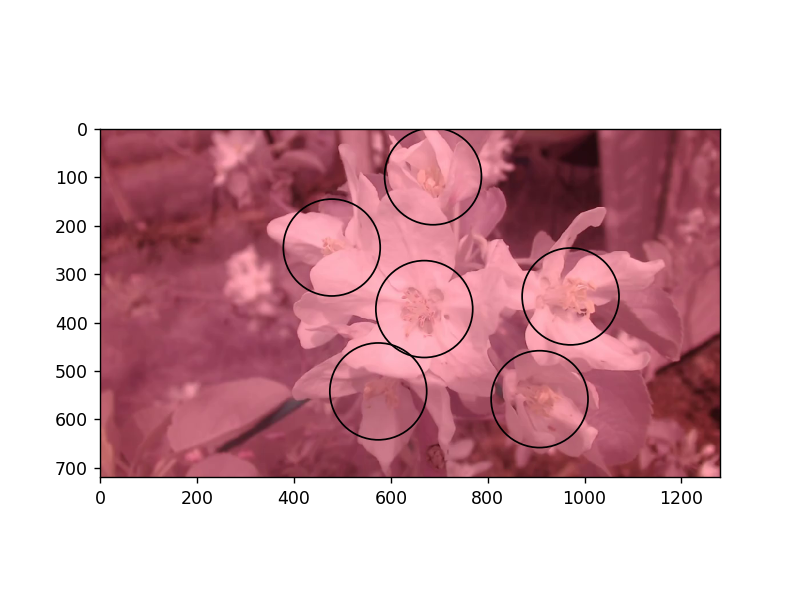

[] [] []


In [4]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(frame)

pointsX = []
pointsY = []
radii = []
def onclick(event):
    if event.key == 'shift':
        
        x, y = int(event.xdata), int(event.ydata)
        pointsX.append(x)
        pointsY.append(y)
        radii.append(50)
        
        circle = plt.Circle((x, y), 100, color='black', fill=False)
        ax.add_patch(circle)
        fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', onclick)
print(pointsX, pointsY, radii)

In [5]:
config.read(loc + videoNo + '.ini')

config.set('globalROI', 'loc', '{:04d}'.format(ROIgX) + ',' + '{:04d}'.format(ROIgY))
config.set('globalROI', 'size', '{:04d}'.format(size[0]) + ',' + '{:04d}'.format(size[1]))

NoROIs = len(pointsX)
config.set('localROI', 'NoROIs', str(NoROIs))
for i in range(len(pointsX)):
    config.set('localROI', 'ROI_' + str(i), '{:04d}'.format(pointsX[i]) + ',' + '{:04d}'.format(pointsY[i]) + ',' + '{:04d}'.format(radii[i]))
    
with open(loc + videoNo + '.ini', 'w') as configfile:
    config.write(configfile)